In [2]:
import numpy as np
from scipy.optimize import minimize

# Função sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Função-objetivo
def funcaoobjetivo(w):
    dados = np.load('questao2_dados.npz')
    X = dados['X']
    y = dados['y']
    lambd = 0.1

    h = sigmoid(X @ w)
    loss = -np.mean(y * np.log(h + 1e-9) + (1 - y) * np.log(1 - h + 1e-9))
    reg = (lambd / 2) * np.sum(w**2)
    return loss + reg

# Chute inicial
n = 500
w0 = np.zeros(n)

# Otimização com Gradiente Conjugado
res = minimize(funcaoobjetivo, w0, method='CG')

# Resultados
custo_final = res.fun
numero_iteracoes = res.nit
numero_avaliacoes = res.nfev

print(f"Custo final: {custo_final:.4f}")
print(f"Número de iterações: {numero_iteracoes}")
print(f"Número de avaliações da função-objetivo: {numero_avaliacoes}")


Custo final: 0.0924
Número de iterações: 5
Número de avaliações da função-objetivo: 8517


In [3]:
import numpy as np
from scipy.optimize import minimize

def gradiente(w):
    dados = np.load('questao2_dados.npz')
    X = dados['X']
    y = dados['y']
    m = len(y)
    lambd = 0.1
    h = sigmoid(X @ w)
    grad = (1/m) * X.T @ (h - y) + lambd * w
    return grad

# Função sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Função-objetivo
def funcaoobjetivo(w):
    dados = np.load('questao2_dados.npz')
    X = dados['X']
    y = dados['y']
    lambd = 0.1

    h = sigmoid(X @ w)
    loss = -np.mean(y * np.log(h + 1e-9) + (1 - y) * np.log(1 - h + 1e-9))
    reg = (lambd / 2) * np.sum(w**2)
    return loss + reg

# Chute inicial
n = 500
w0 = np.zeros(n)

# Otimização com Gradiente Conjugado
res = minimize(funcaoobjetivo, w0, method='CG', jac=gradiente)

# Resultados
custo_final = res.fun
numero_iteracoes = res.nit
numero_avaliacoes = res.nfev

print(f"Custo final: {custo_final:.4f}")
print(f"Número de iterações: {numero_iteracoes}")
print(f"Número de avaliações da função-objetivo: {numero_avaliacoes}")


Custo final: 0.0924
Número de iterações: 5
Número de avaliações da função-objetivo: 17


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve

# Carregar dados
dados = np.load('questao2_dados.npz')
X = dados['X']
y = dados['y']

# Suponha que w_final é o vetor de pesos otimizados
# ex: w_final = res.x
w_final = res.x

# 1. Probabilidades preditas
probabilidades = sigmoid(X @ w_final)

prec, rec, thresholds = precision_recall_curve(y, probabilidades)

# 2. Classe predita: 1 se prob > 0.5, senão 0
predicoes = (probabilidades >= 0.5).astype(int)

# 3. Acurácia
acuracia = accuracy_score(y, predicoes)

# 4. Matriz de confusão
matriz_confusao = confusion_matrix(y, predicoes)

# 5. AUC
auc = roc_auc_score(y, probabilidades)

# Mostrar resultados
print(f"Acurácia: {acuracia:.4f}")
print("Matriz de confusão:")
print(matriz_confusao)
print(f"AUC: {auc:.4f}")

Acurácia: 0.9827
Matriz de confusão:
[[   0  173]
 [   0 9827]]
AUC: 0.8290


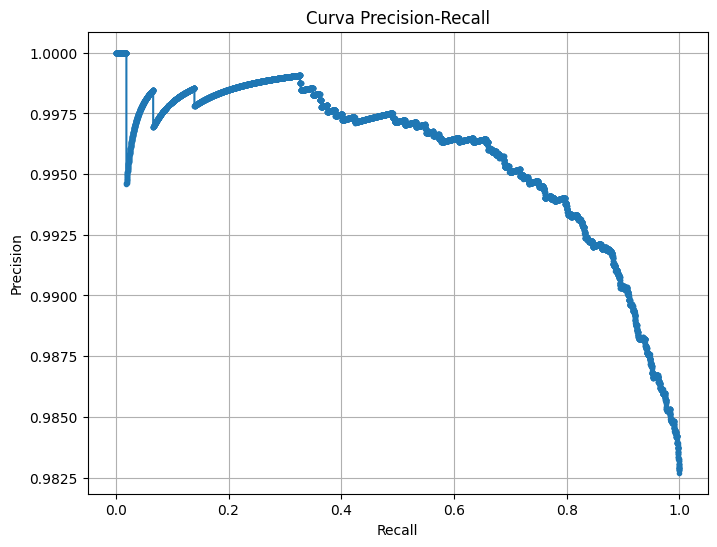

In [7]:
import matplotlib.pyplot as plt

# Plotando a curva Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(rec, prec, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()


In [8]:
from sklearn.metrics import f1_score

# Calcular F1-score para cada threshold
f1_scores = []
for t in thresholds:
    y_pred = (probabilidades >= t).astype(int)
    f1_scores.append(f1_score(y, y_pred))

# Melhor threshold
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Melhor threshold: {best_threshold:.4f}")
print(f"Melhor F1-score: {best_f1:.4f}")

Melhor threshold: 0.9690
Melhor F1-score: 0.9913


In [9]:
# Predições com o novo threshold ótimo
y_pred_otimo = (probabilidades >= best_threshold).astype(int)

# Novas métricas
acuracia_otima = accuracy_score(y, y_pred_otimo)
matriz_otima = confusion_matrix(y, y_pred_otimo)

print(f"Acurácia com threshold ótimo: {acuracia_otima:.4f}")
print("Matriz de confusão com threshold ótimo:")
print(matriz_otima)

Acurácia com threshold ótimo: 0.9828
Matriz de confusão com threshold ótimo:
[[   1  172]
 [   0 9827]]


In [10]:
# Carregando os dados
dados = np.load('questao2_dados.npz')
y = dados['y']

# Contar quantas amostras de cada classe
classes, contagens = np.unique(y, return_counts=True)

# Mostrar resultados
for classe, contagem in zip(classes, contagens):
    print(f"Classe {int(classe)}: {contagem} amostras")

# Proporção percentual
total = len(y)
for classe, contagem in zip(classes, contagens):
    porcentagem = 100 * contagem / total
    print(f"Classe {int(classe)} representa {porcentagem:.2f}% dos dados")


Classe 0: 173 amostras
Classe 1: 9827 amostras
Classe 0 representa 1.73% dos dados
Classe 1 representa 98.27% dos dados
